## Observations and Insights 

Inferences from data analysis

Ramicane and Capomulin have very low mean tumour volumes (40.21, 40.67), and much lower standard deviations, compared to other drug regimens. This lower standard deviation is also supported by the box plot charts showing much lower Inter-Quartile Range for Ramicane and Capomulin, compared to Infubinol and Ceftamin.

Based on scatter plots of Capomulin and Ramicane, it seems the tumour volumes of mice under both treatments seem to decrease over time.

Finally, there seems to be a fairly strong positive correlation between weight and final tumour volume under the Capomulin treatment, based on a visual inspection of the last scatterplot and the linear regression model.



In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_data_complete=pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])

In [5]:
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mouse_count=mouse_data_complete["Mouse ID"].count()

In [7]:
print(mouse_count)

1893


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF =mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]

In [9]:
print(duplicateRowsDF)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_complete = mouse_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_count=clean_mouse_complete["Mouse ID"].count()

In [12]:
print(clean_count)

1888


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_unique=clean_mouse_complete["Drug Regimen"].unique().tolist()
regimen_unique



['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [14]:
regimen_summary=pd.DataFrame(clean_mouse_complete.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": [np.size, np.mean, np.median, np.var, np.std, st.sem]}).reset_index())
regimen_summary.columns = ['Drug','Count', 'Mean', 'Median', 'Var', 'Std', 'SEM']
regimen_summary = regimen_summary.reset_index()
regimen_summary

C:\Users\09887460\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\09887460\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\09887460\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,index,Drug,Count,Mean,Median,Var,Std,SEM
0,0,Capomulin,230.0,40.675741,41.557809,24.947764,4.994774,0.329346
1,1,Ceftamin,178.0,52.591172,51.776157,39.290177,6.268188,0.469821
2,2,Infubinol,178.0,52.884795,51.820584,43.128684,6.567243,0.492236
3,3,Ketapril,188.0,55.235638,53.698743,68.553577,8.279709,0.603860
4,4,Naftisol,186.0,54.331565,52.509285,66.173479,8.134708,0.596466
5,5,Placebo,181.0,54.033581,52.288934,61.168083,7.821003,0.581331
6,6,Propriva,156.0,52.393463,50.909965,43.138803,6.568014,0.525862
7,7,Ramicane,228.0,40.216745,40.673236,23.486704,4.846308,0.320955
8,8,Stelasyn,181.0,54.233149,52.431737,59.450562,7.710419,0.573111
9,9,Zoniferol,182.0,53.236507,51.818479,48.533355,6.966589,0.516398


In [15]:
type(regimen_summary)

pandas.core.frame.DataFrame

In [16]:
regimen_summary.dtypes

index       int64
Drug       object
Count     float64
Mean      float64
Median    float64
Var       float64
Std       float64
SEM       float64
dtype: object

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

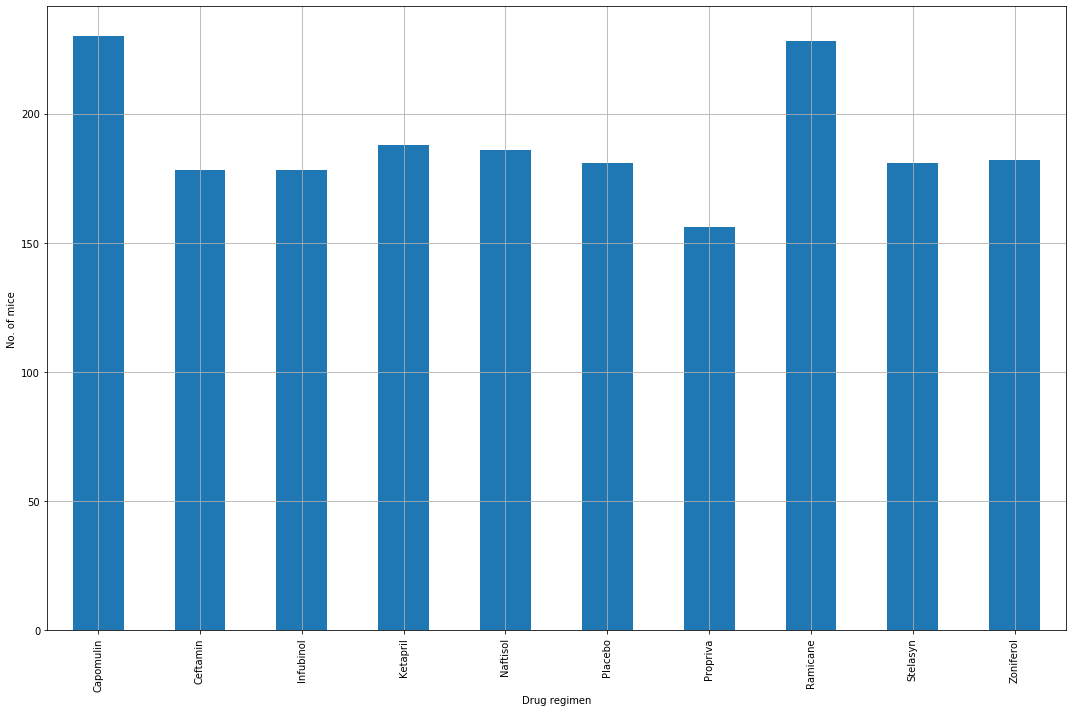

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
ax = regimen_summary.plot.bar(x="Drug", y="Count", figsize=(15, 10))
ax.get_legend().remove()
plt.xlabel("Drug regimen")
plt.ylabel("No. of mice")
plt.tight_layout()
plt.grid()

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

In [20]:
regimen_count=regimen_summary["Count"].tolist()
regimen_count

[230.0, 178.0, 178.0, 188.0, 186.0, 181.0, 156.0, 228.0, 181.0, 182.0]

In [21]:
type(regimen_count)

list

In [22]:
regimen_list=regimen_summary["Drug"].tolist()
regimen_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

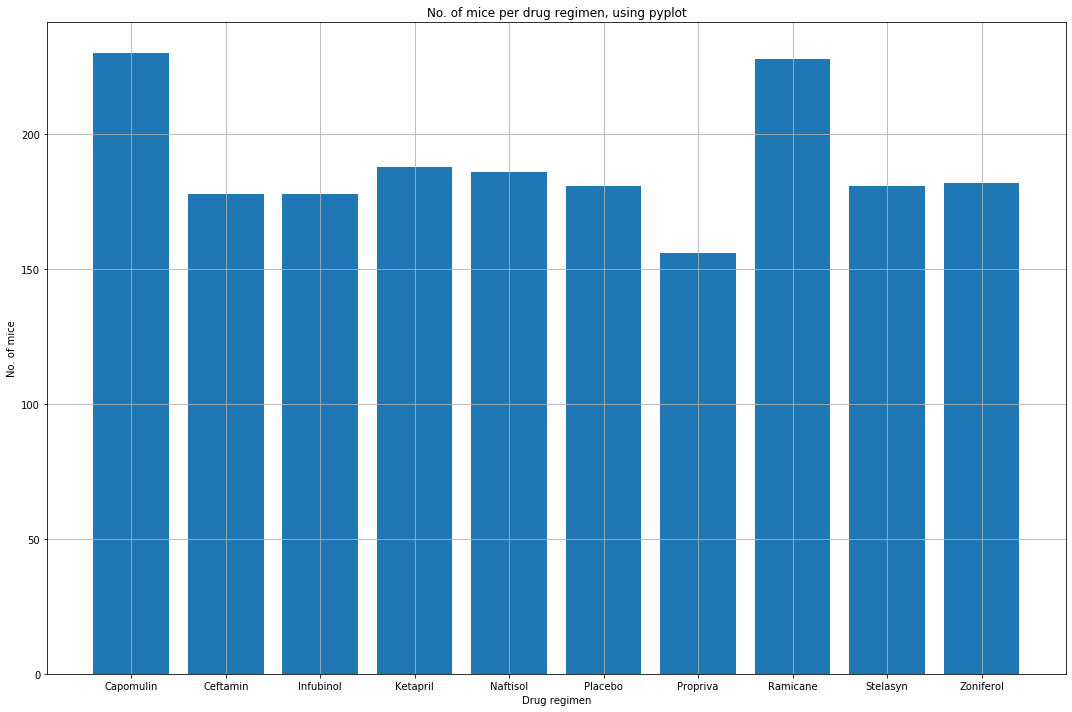

In [23]:
plt.figure(figsize=(15,10))
plt.bar(regimen_list, regimen_count, align='center')
plt.title("No. of mice per drug regimen, using pyplot")
plt.xlabel("Drug regimen")
plt.ylabel("No. of mice")
plt.tight_layout()

#plt.xticks(len(regimen_summary["Drug"]) 
plt.grid()
#plt.xlim(-0.75, len(regimen_summary["Drug"])+0.25)

# Bar Charts

In [24]:
sex_summary=pd.DataFrame(clean_mouse_complete.groupby(["Sex"]).agg({"Mouse ID": [np.size]}).reset_index())
sex_summary.columns = ['Sex','Count']
sex_summary = sex_summary.reset_index()
sex_summary.Count = sex_summary.Count.astype(int)
sex_summary

,index,Sex,Count
0,0,Female,930
1,1,Male,958


In [25]:
sex_summary.dtypes

index     int64
Sex      object
Count     int32
dtype: object

In [26]:
sex_list=sex_summary['Sex'].tolist()
sex_list

['Female', 'Male']

In [27]:
sex_count=sex_summary['Count'].tolist()
sex_count

[930, 958]

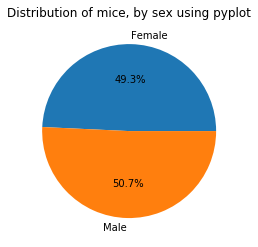

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_list, autopct='%.1f%%')
plt.title("Distribution of mice, by sex using pyplot")
plt.show()


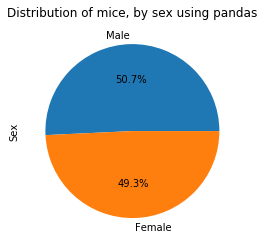

In [29]:
clean_mouse_complete['Sex'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title("Distribution of mice, by sex using pandas")
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time=pd.DataFrame(clean_mouse_complete.groupby(["Mouse ID"]).
                      agg({"Timepoint": "max"}).reset_index())
max_time.head()



,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [31]:
max_time["Mouse ID"].count()

249

In [32]:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_complete=pd.merge(max_time, clean_mouse_complete, how="left", left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
max_time_complete["Mouse ID"].count()

249

In [33]:
max_time_complete.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=max_time_complete["Drug Regimen"].tolist()
treatment_list[:10]

['Infubinol',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ramicane',
 'Ramicane',
 'Ketapril',
 'Stelasyn']

In [35]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]
    

# Calculating Quartiles

In [36]:
    # Locate the rows which contain mice Capomulin and get the tumor volumes
Capomulin_tumor = max_time_complete.loc[max_time_complete["Drug Regimen"] =="Capomulin", ["Tumor Volume (mm3)"]].reset_index()
Capomulin_tumor=Capomulin_tumor["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_quartiles=Capomulin_tumor.quantile([.25,.5, 0.75])
cap_lowerq=np.round(cap_quartiles[.25], decimals=2)
cap_upperq=np.round(cap_quartiles[.75], decimals=2)
cap_IQR=np.round(cap_upperq-cap_lowerq, decimals=2)
   # Determine outliers using upper and lower bounds
cap_lower_bound=cap_lowerq-(1.5*cap_IQR)
cap_upper_bound=cap_upperq+(1.5*cap_IQR)
print(cap_quartiles)
print(f"The lower quartile for Capomulin is {cap_lowerq} (mm3)")
print(f"The upper quartile for Capomulin is {cap_upperq} (mm3)")
print(f"The inter-quartile range for Capomulin is {cap_IQR} (mm3)")
print(f"Values below {cap_lower_bound} could be outliers")
print(f"Values above {cap_upper_bound} could be outliers")

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The lower quartile for Capomulin is 32.38 (mm3)
The upper quartile for Capomulin is 40.16 (mm3)
The inter-quartile range for Capomulin is 7.78 (mm3)
Values below 20.71 could be outliers
Values above 51.83 could be outliers


In [37]:
    # Locate the rows which contain mice on Ramicane and get the tumor volumes
Ramicane_tumor = max_time_complete.loc[max_time_complete["Drug Regimen"] =="Ramicane", ["Tumor Volume (mm3)"]].reset_index()
Ramicane_tumor=Ramicane_tumor["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_quartiles=Ramicane_tumor.quantile([.25,.5, 0.75])
ram_lowerq=np.round(ram_quartiles[.25], decimals=2)
ram_upperq=np.round(ram_quartiles[.75], decimals=2)
ram_IQR=np.round(ram_upperq-ram_lowerq, decimals=2)
   # Determine outliers using upper and lower bounds
ram_lower_bound=ram_lowerq-(1.5*ram_IQR)
ram_upper_bound=ram_upperq+(1.5*ram_IQR)
print(ram_quartiles)
print(f"The lower quartile for Ramicane is {ram_lowerq} (mm3)")
print(f"The upper quartile for Ramicane is {ram_upperq} (mm3)")
print(f"The inter-quartile range for Ramicane is {ram_IQR} (mm3)")
print(f"Values below {ram_lower_bound} could be outliers")
print(f"Values above {ram_upper_bound} could be outliers")

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The lower quartile for Ramicane is 31.56 (mm3)
The upper quartile for Ramicane is 40.66 (mm3)
The inter-quartile range for Ramicane is 9.1 (mm3)
Values below 17.91 could be outliers
Values above 54.309999999999995 could be outliers


In [38]:
    # Locate the rows which contain mice on Infubinol and get the tumor volumes
Infubinol_tumor = max_time_complete.loc[max_time_complete["Drug Regimen"] =="Infubinol", ["Tumor Volume (mm3)"]].reset_index()
Infubinol_tumor=Infubinol_tumor["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inf_quartiles=Infubinol_tumor.quantile([.25,.5, 0.75])
inf_lowerq=np.round(inf_quartiles[.25], decimals=2)
inf_upperq=np.round(inf_quartiles[.75], decimals=2)
inf_IQR=np.round(inf_upperq-inf_lowerq, decimals=2)
   # Determine outliers using upper and lower bounds
inf_lower_bound=inf_lowerq-(1.5*inf_IQR)
inf_upper_bound=inf_upperq+(1.5*inf_IQR)
print(inf_quartiles)
print(f"The lower quartile for Infubinol is {inf_lowerq} (mm3)")
print(f"The upper quartile for Infubinol is {inf_upperq} (mm3)")
print(f"The inter-quartile range for Infubinol is {inf_IQR} (mm3)")
print(f"Values below {inf_lower_bound} could be outliers")
print(f"Values above {inf_upper_bound} could be outliers")

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The lower quartile for Infubinol is 54.05 (mm3)
The upper quartile for Infubinol is 65.53 (mm3)
The inter-quartile range for Infubinol is 11.48 (mm3)
Values below 36.83 could be outliers
Values above 82.75 could be outliers


In [39]:
    # Locate the rows which contain mice on Ceftamin and get the tumor volumes
Ceftamin_tumor = max_time_complete.loc[max_time_complete["Drug Regimen"] =="Ceftamin", ["Tumor Volume (mm3)"]].reset_index()
Ceftamin_tumor=Ceftamin_tumor["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cef_quartiles=Ceftamin_tumor.quantile([.25,.5, 0.75])
cef_lowerq=np.round(cef_quartiles[.25], decimals=2)
cef_upperq=np.round(cef_quartiles[.75], decimals=2)
cef_IQR=np.round(cef_upperq-cef_lowerq, decimals=2)
   # Determine outliers using upper and lower bounds
cef_lower_bound=cef_lowerq-(1.5*cef_IQR)
cef_upper_bound=cef_upperq+(1.5*cef_IQR)
print(cef_quartiles)
print(f"The lower quartile for Ceftamin is {cef_lowerq} (mm3)")
print(f"The upper quartile for Ceftamin is {cef_upperq} (mm3)")
print(f"The inter-quartile range for Ceftamin is {cef_IQR} (mm3)")
print(f"Values below {cef_lower_bound} could be outliers")
print(f"Values above {cef_upper_bound} could be outliers")

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
The lower quartile for Ceftamin is 48.72 (mm3)
The upper quartile for Ceftamin is 64.3 (mm3)
The inter-quartile range for Ceftamin is 15.58 (mm3)
Values below 25.349999999999998 could be outliers
Values above 87.67 could be outliers


# Calculate Boxplot

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
shortlist=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
shortlist_df = max_time_complete[max_time_complete["Drug Regimen"].isin(shortlist)] 


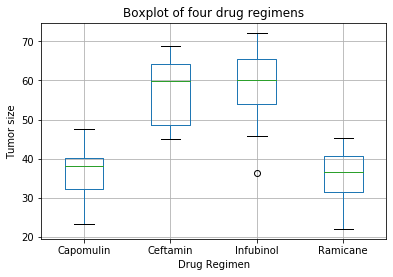

In [41]:
boxplot=shortlist_df.boxplot(column='Tumor Volume (mm3)', by="Drug Regimen")
plt.title("Boxplot of four drug regimens")
plt.ylabel("Tumor size")
plt.suptitle('')
plt.show()

## Line and Scatter Plots

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_mouse_time = clean_mouse_complete.loc[clean_mouse_complete["Mouse ID"]=="s185", ["Timepoint"]]
Capomulin_mouse_tumor = clean_mouse_complete.loc[clean_mouse_complete["Mouse ID"]=="s185", ["Tumor Volume (mm3)"]]
Capomulin_mouse_tumor
Capomulin_mouse_time

,Timepoint
10,0
11,5
12,10
13,15
14,20
15,25
16,30
17,35
18,40
19,45


In [43]:
type(Capomulin_mouse_time)

pandas.core.frame.DataFrame

In [44]:
xticks=Capomulin_mouse_time["Timepoint"].tolist()

In [45]:
type(xticks)

list

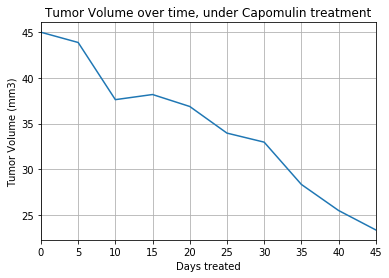

In [46]:
plt.plot(Capomulin_mouse_time, Capomulin_mouse_tumor)
plt.xlabel("Days treated")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over time, under Capomulin treatment")
plt.xticks(ticks=xticks)
plt.xlim(xticks[0],xticks[-1] )
plt.grid()
plt.show()

In [ ]:
#Show scatter plot showing Tumor volume for all mice, under Capomulin over time

In [63]:
Capomulin_complete_tumor = clean_mouse_complete.loc[clean_mouse_complete["Drug Regimen"] =="Capomulin", ["Tumor Volume (mm3)"]].reset_index()
Capomulin_complete_tumor=Capomulin_complete_tumor["Tumor Volume (mm3)"]
Capomulin_complete_time = clean_mouse_complete.loc[clean_mouse_complete["Drug Regimen"] =="Capomulin", ["Timepoint"]].reset_index()
Capomulin_complete_time=Capomulin_complete_time["Timepoint"]

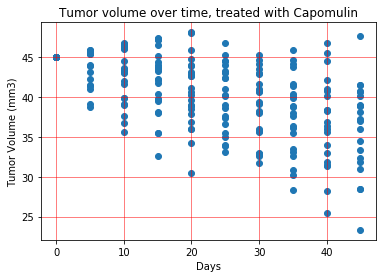

In [67]:

plt.scatter(Capomulin_complete_time, Capomulin_complete_tumor)
plt.title("Tumor volume over time, treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Days")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#Show scatter plot showing Tumor volume for all mice, under Ramicane over time

In [68]:
Ramicane_complete_tumor = clean_mouse_complete.loc[clean_mouse_complete["Drug Regimen"] =="Ramicane", ["Tumor Volume (mm3)"]].reset_index()
Ramicane_complete_tumor=Ramicane_complete_tumor["Tumor Volume (mm3)"]
Ramicane_complete_time = clean_mouse_complete.loc[clean_mouse_complete["Drug Regimen"] =="Ramicane", ["Timepoint"]].reset_index()
Ramicane_complete_time=Ramicane_complete_time["Timepoint"]

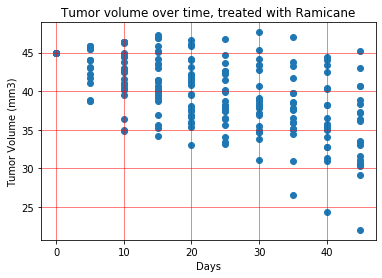

In [70]:
plt.scatter(Ramicane_complete_time, Ramicane_complete_tumor)
plt.title("Tumor volume over time, treated with Ramicane")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Days")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [58]:
Capomulin_complete.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = max_time_complete.loc[max_time_complete["Drug Regimen"] =="Capomulin", ["Weight (g)"]].reset_index()
type(Capomulin_df)

pandas.core.frame.DataFrame

In [48]:
mouse_weight = max_time_complete.loc[max_time_complete["Drug Regimen"] =="Capomulin", ["Weight (g)"]].reset_index()
mouse_weight=mouse_weight["Weight (g)"]
tumor_volume=Capomulin_tumor

In [49]:
type(mouse_weight)

pandas.core.series.Series

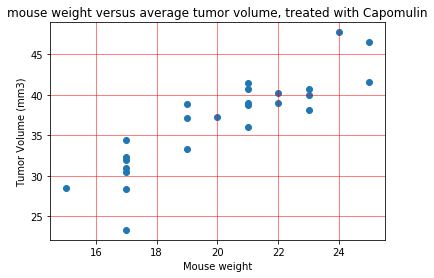

In [50]:
plt.scatter(mouse_weight, tumor_volume)
plt.title("mouse weight versus average tumor volume, treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse weight")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = mouse_weight. corr(tumor_volume) 
print(f"the correlation is {correlation}")

the correlation is 0.876706040365812


In [52]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(mouse_weight, tumor_volume)

In [53]:
print(f"The linear regression has an estimated slope of {slope}, with an intercept of {intercept}")
print(f"The R-Squared value (a measure of the explanatory power of our model) is {rvalue}")

The linear regression has an estimated slope of 1.750468228958504, with an intercept of 1.4481469525549002
The R-Squared value (a measure of the explanatory power of our model) is 0.8767060403658119


In [54]:
print(f"y={slope}x+{intercept}")

y=1.750468228958504x+1.4481469525549002


In [55]:
tumor_pred=mouse_weight*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))
tumor_pred

0     39.958448
1     38.207980
2     31.206107
3     34.707043
4     39.958448
5     43.459384
6     36.457512
7     41.708916
8     38.207980
9     38.207980
10    34.707043
11    31.206107
12    34.707043
13    45.209853
14    31.206107
15    45.209853
16    31.206107
17    41.708916
18    31.206107
19    31.206107
20    38.207980
21    41.708916
22    38.207980
23    27.705170
24    31.206107
Name: Weight (g), dtype: float64

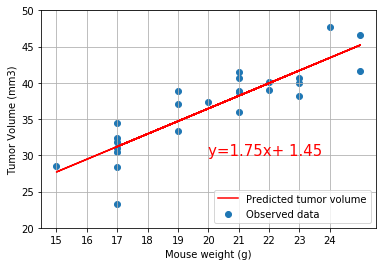

In [56]:
plt.scatter(mouse_weight, tumor_volume, label="Observed data")
plt.plot(mouse_weight,tumor_pred, color="r", label="Predicted tumor volume")
plt.legend(loc="lower right")
plt.grid()
xw_ticks=pd.Series(np.arange(15,25,1))
yw_ticks=pd.Series(np.arange(20,50,1))
plt.xticks(ticks=xw_ticks)
plt.ylim(20, 50)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_eq, (20, 30), fontsize=15, color="red")
plt.show()